In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'pima-indians-diabetes.csv'
names=['preg','plas','pres','skin', 'test', 'mass','pedi','age','class']

data=pd.read_csv(filename,names=names)
array = data.values
# print(array[:2])

X = array[:,:-1]
Y = array[:,-1]

print(X[0],Y[0])

[   6.     148.      72.      35.       0.      33.6      0.627   50.   ] 1.0


In [6]:
from sklearn import cross_validation
num_folds = 10
num_instances = len(X)
seed = 7

kfold = cross_validation.KFold(n=num_instances,n_folds=num_folds,random_state = seed)

In [4]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#prepare models
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [10]:
results = []
names = []
scoring = "accuracy"

for name,model in models:
    cv_result = cross_validation.cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg = "%s: %f (%f)"%(name,cv_result.mean(),cv_result.std())
    print(msg)

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.682211 (0.060894)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


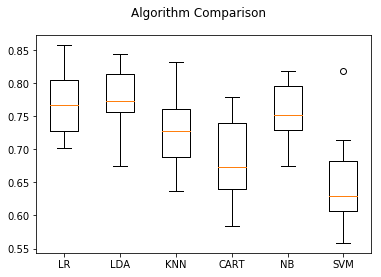

In [11]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
cv_result

array([ 0.58441558,  0.71428571,  0.55844156,  0.61038961,  0.64935065,
        0.61038961,  0.81818182,  0.67532468,  0.68421053,  0.60526316])